# Aligning SMPMF

minimum fluctuation: 2.354661825984506 located at 136.0deg


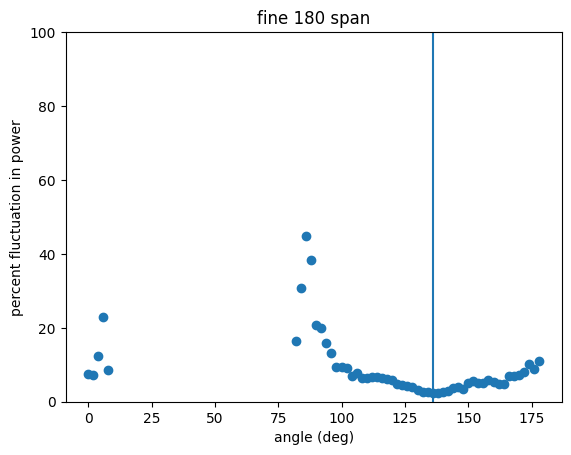

In [2]:
import numpy as np
import matplotlib.pyplot as plt

angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\input_rotation_for_reals.npy")
plt.scatter(angles,fluctuations)
plt.ylim(0,100)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')
plt.title('fine 180 span')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])

minimum fluctuation: 1.7680817725248883 located at 52.0deg


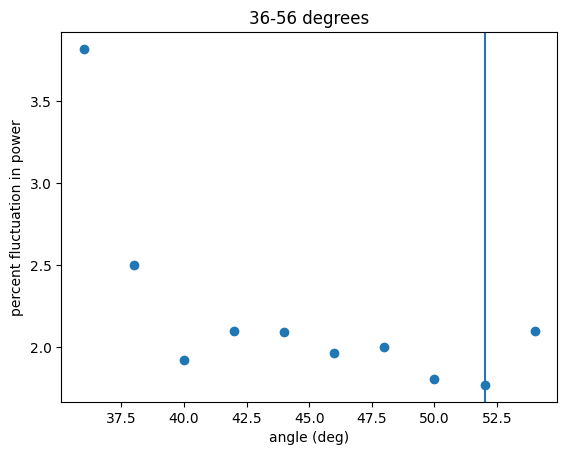

In [4]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\inputpolarisation_36_56_2deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('36-56 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])

minimum fluctuation: 2.0085987561045777 located at 140.0deg


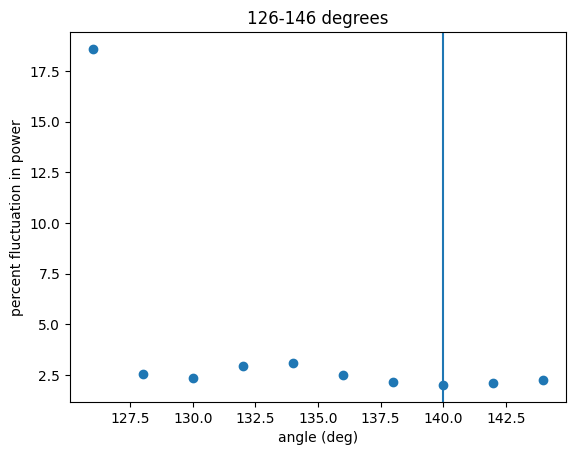

In [5]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\inputpolarisation_125_145_2deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('126-146 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])

minimum fluctuation: 1.7407802538998087 located at 130.0deg


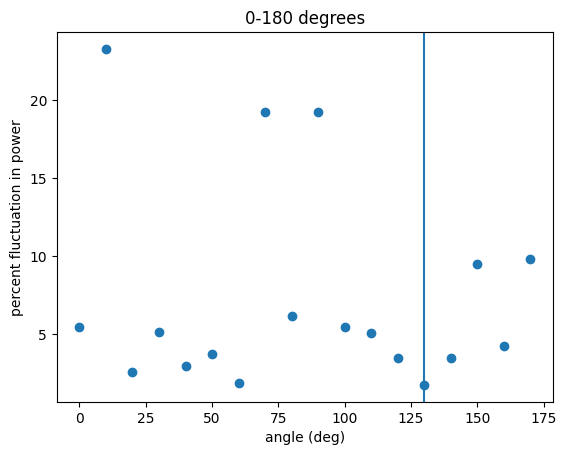

In [6]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\input_rotation_0_180_10deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('0-180 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])

minimum fluctuation: 3.146522370027212 located at 134.0deg


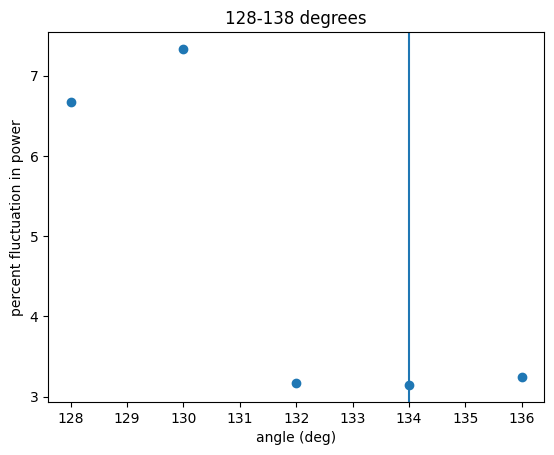

In [7]:
angles, fluctuations = np.load(r"C:\Users\marku\Desktop\Code\PMF alignment data\input_rotation_128_138_2deg.npy")
plt.scatter(angles,fluctuations)
plt.xlabel('angle (deg)')
plt.ylabel('percent fluctuation in power')

plt.title('128-138 degrees')

min_f = fluctuations.min()
a_min_f = fluctuations.argmin()
print('minimum fluctuation: {} located at {}deg'.format(min_f, angles[a_min_f]))

plt.axvline(angles[a_min_f])